<a href="https://colab.research.google.com/github/a-tayo/Hamoye-Internship-Spring-23/blob/main/Stage_C_graded_quiz_tag_along_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Download and extract the data
!wget "https://archive.ics.uci.edu/static/public/471/electrical+grid+stability+simulated+data.zip"
!unzip  -o 'electrical+grid+stability+simulated+data.zip'

--2023-07-03 12:09:01--  https://archive.ics.uci.edu/static/public/471/electrical+grid+stability+simulated+data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘electrical+grid+stability+simulated+data.zip.1’

electrical+grid+sta     [   <=>              ]   2.31M  4.80MB/s    in 0.5s    

2023-07-03 12:09:02 (4.80 MB/s) - ‘electrical+grid+stability+simulated+data.zip.1’ saved [2418013]

Archive:  electrical+grid+stability+simulated+data.zip
 extracting: Data_for_UCI_named.csv  


In [23]:
# imports
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# set random state
RANDOM_STATE = 1

In [7]:
# load and preview data
data_uci = pd.read_csv('Data_for_UCI_named.csv')
print(data_uci.shape)
data_uci.head()

(10000, 14)


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [14]:
quiz_df = data_uci.drop(columns = ['stab'])
X, y = quiz_df.drop('stabf', axis=1), quiz_df['stabf']

# encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print(y_encoded)
X.head()

[1 0 1 ... 0 1 1]


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [15]:
# split the the data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_encoded, random_state = RANDOM_STATE, test_size=0.2)

In [ ]:
#

In [16]:
# scale the dataset
std_scaler = StandardScaler()
Xtrain_scaled = std_scaler.fit_transform(Xtrain, ytrain)
Xtest_scaled = std_scaler.transform(Xtest)

In [17]:
# instantiate the models
model_rf = RandomForestClassifier(random_state = RANDOM_STATE)
model_extr = ExtraTreesClassifier(random_state = RANDOM_STATE)
model_lgbm = LGBMClassifier(random_state = RANDOM_STATE)
model_xgb = XGBClassifier(random_state = RANDOM_STATE)

model_list = [model_rf, model_extr, model_lgbm, model_xgb]

In [38]:
for clf in model_list:
  clf.fit(Xtrain_scaled, ytrain)
  print('-'*50)
  print("Classification report for ", clf.__class__.__name__)
  print('-'*50)

  print("Accuracy Score: ", accuracy_score(ytest, clf.predict(Xtest_scaled)))
  print(classification_report(ytest, clf.predict(Xtest_scaled)))
  print()

--------------------------------------------------
Classification report for  RandomForestClassifier
--------------------------------------------------
Accuracy Score:  0.929
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       712
           1       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000


--------------------------------------------------
Classification report for  ExtraTreesClassifier
--------------------------------------------------
Accuracy Score:  0.928
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       712
           1       0.92      0.97      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      200

In [27]:
model_extr = ExtraTreesClassifier(random_state = RANDOM_STATE)
params_grid = {'n_estimators': [100, 300, 500, 1000],
               'min_samples_split': [2, 5, 7],
               'min_samples_leaf': [4, 6, 8],
               'max_features': [None, 'auto', 'log2']}
clf = RandomizedSearchCV(model_extr, params_grid, random_state=RANDOM_STATE,
                        cv = 5, n_iter = 10, scoring = 'accuracy', n_jobs = -1,
                        verbose = 1)
clf.fit(Xtrain_scaled, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': [None, 'auto', 'log2'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 300, 500, 1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [28]:
# print the best parameters obtained
clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'auto'}

In [34]:
clf_cv = ExtraTreesClassifier(**clf.best_params_, random_state = RANDOM_STATE)
clf_cv.fit(Xtrain_scaled, ytrain)
print('Accuracy Score: ', accuracy_score(ytest, clf_cv.predict(Xtest_scaled)));

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy Score:  0.9185


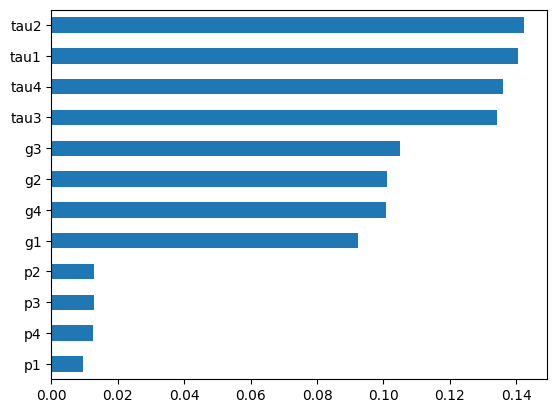

In [35]:
# plot feature importances
features_importances = pd.Series(clf_cv.feature_importances_, index = Xtest.columns)
features_importances.sort_values().plot(kind = 'barh');